In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
offers=pd.read_csv('data.csv',parse_dates=['became_member_on'])
profile = pd.read_json('profile.json', orient='records', lines=True)

In [4]:
profile.dropna(axis=0,inplace=True)
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


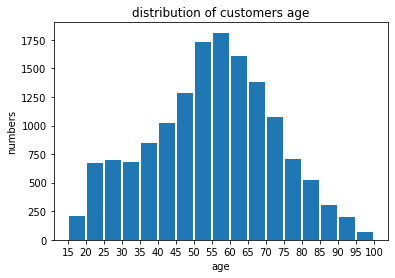

In [5]:
bins=np.arange(15,profile.age.max(),5)
plt.hist(data=profile,x='age',bins=bins,rwidth=.9)
plt.xticks(bins)
plt.xlabel('age')
plt.ylabel('numbers')
plt.title('distribution of customers age');

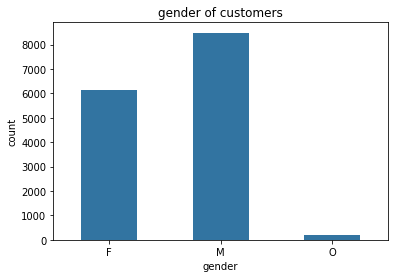

In [6]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
fig, ax = plt.subplots()
base_color=sns.color_palette()[0]
sns.countplot(data=profile,x='gender',color=base_color)
plt.xlabel('gender')
plt.title('gender of customers')



change_width(ax,.5)
plt.show();

In [9]:
round(profile.gender.value_counts()*100/profile.shape[0],2)

M    57.23
F    41.34
O     1.43
Name: gender, dtype: float64

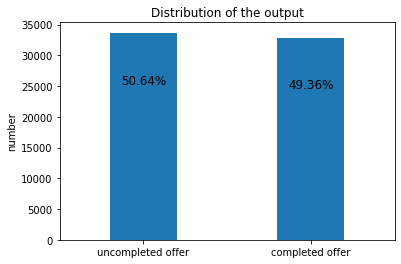

In [39]:
ax=offers.success.value_counts().plot(kind='bar')
plt.xticks([0,1],['uncompleted offer','completed offer'],rotation=0)
plt.ylabel('number')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height*.75 ,
            '{:1.2f}%'.format(height*100/offers.shape[0]),
            ha="center",fontdict={'size':12})
plt.title('Distribution of the output');
change_width(ax,.4)


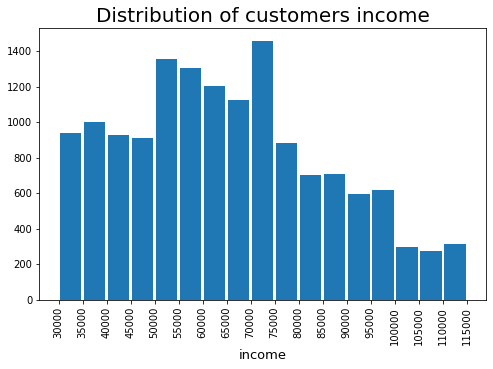

In [35]:
plt.figure(figsize=(8,5))
bins=np.arange(offers.income.min(),offers.income.max(),5000)
plt.hist(data=profile,x='income',bins=bins,rwidth=.9)
plt.xticks(bins,rotation=90)
plt.xlabel('income', fontdict = {'fontsize' : 13})
plt.title('Distribution of customers income', fontdict = {'fontsize' : 20});

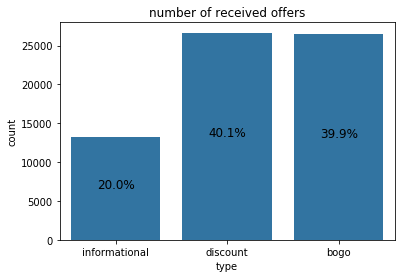

In [36]:
base_color = sns.color_palette()[0]
sns.countplot(data = offers, x = 'type', color = base_color)
plt.title('number of received offers')
# add annotations
n_points = offers.shape[0]
cat_counts = offers['type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count/2, pct_string, ha = 'center', color = 'black',fontdict={'fontsize':12})

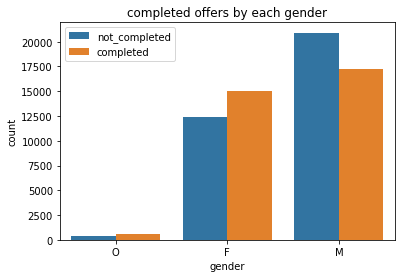

In [155]:
ax=sns.countplot(data = offers, x = 'gender',hue='success' )
plt.title('completed offers by each gender') 
plt.legend(['not_completed','completed']);

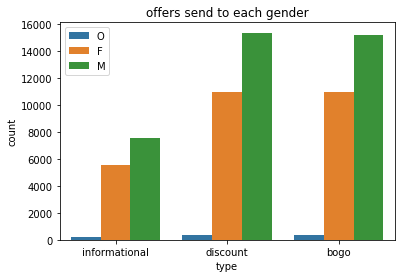

In [135]:
ax=sns.countplot(data = offers, x = 'type',hue='gender' )
plt.title('offers recieved  by each gender') 
plt.legend();

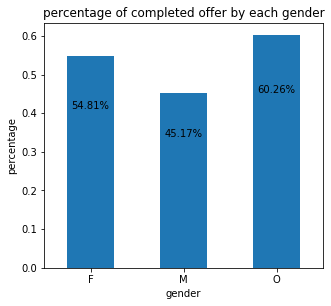

In [226]:
ax=offers.groupby(['gender'])['success'].mean().plot(kind='bar',figsize=(5,4.5))
plt.ylabel('percentage')
plt.xticks(rotation=0)
plt.title('percentage of completed offer by each gender');
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height*.75 ,
            '{:1.2f}%'.format(height*100),
            ha="center") 

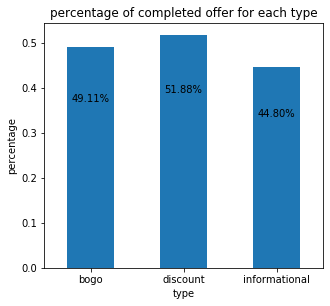

In [229]:
ax=offers.groupby(['type'])['success'].mean().plot(kind='bar',figsize=(5,4.5))
plt.ylabel('percentage')
plt.xticks(rotation=0)
plt.title('percentage of completed offer for each type');
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height*.75 ,
            '{:1.2f}%'.format(height*100),
            ha="center") 

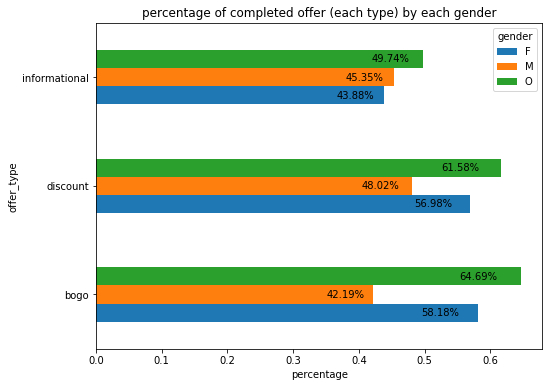

In [228]:
ax=offers.groupby(['type','gender'])['success'].mean().unstack().plot(kind='barh',figsize=(8,6))
plt.legend( ncol = 1,title='gender')
plt.xlabel('percentage')
plt.ylabel('offer_type')
plt.title('percentage of completed offer (each type) by each gender');
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width()*.9, p.get_y()+.5*p.get_height(),
             '{:1.2f}%'.format(width*100),
             ha='center', va='center')

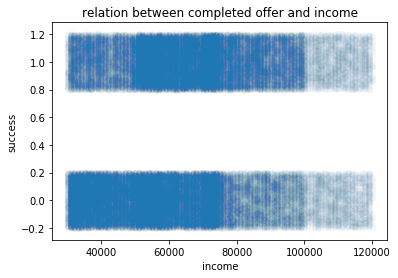

In [238]:
sns.regplot(data = offers, x = 'income', y = 'success', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : .01})
plt.title('relation between completed offer and income');

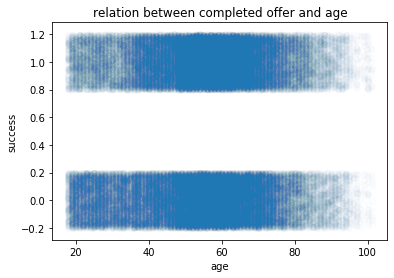

In [242]:
sns.regplot(data = offers, x = 'age', y = 'success', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : .01})
plt.title('relation between completed offer and age');

In [286]:
temp=offers.copy()

In [287]:
temp=temp[temp.type=='discount']
temp.replace({'last_discount_completed':{-1:np.inf}},inplace=True)
temp['last_received']=temp.time-temp.last_discount_completed

In [288]:
temp.replace({'last_received':{-1*np.inf:1000}},inplace=True)


In [290]:
#temp.last_received.value_counts()

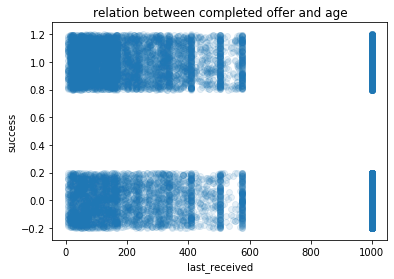

In [299]:
sns.regplot(data = temp, x = 'last_received', y = 'success', fit_reg = False,
           x_jitter = 0.5, y_jitter = 0.2, scatter_kws = {'alpha' : .1})
plt.title('relation between completed offer and age');

In [300]:
offers.to_csv('data.csv',index=False)